In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# example project is in Drive
PROJECT = "/content/drive/MyDrive/hazelnut_inspection_project"
%cd $PROJECT
!ls

Mounted at /content/drive
/content/drive/MyDrive/hazelnut_inspection_project
app.py	main.py    outputs    requirements.txt	src
data	notebooks  README.md  save_models	train.py


=== PHÂN TÍCH HẠT TỐT (GOOD) ===


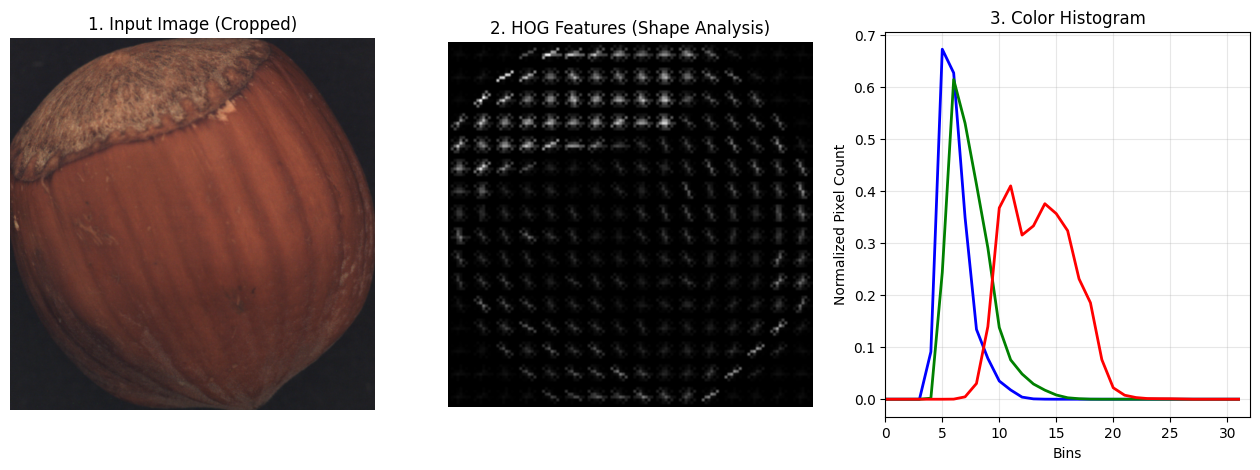

📊 Độ dài Vector đặc trưng cuối cùng: 8196 chiều

=== PHÂN TÍCH HẠT LỖI (VÍ DỤ: PRINT/VẾT MỰC) ===


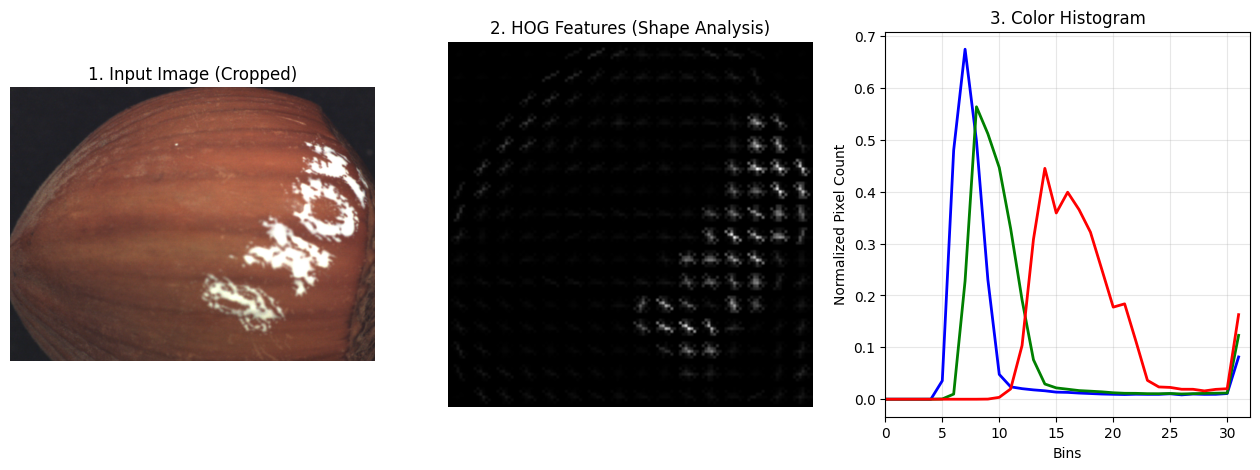

📊 Độ dài Vector đặc trưng cuối cùng: 8196 chiều


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import glob
from skimage.feature import hog

# Hack src path
sys.path.append(os.path.abspath('..'))

from src.preprocessing import remove_background
from src.features import extract_features
from src import config

# --- Helper function to plot charts ---
def visualize_data_analysis(img_path):
    # 1. Read image and Preprocessing
    original_img = cv2.imread(img_path)
    processed_img, mask = remove_background(original_img)

    # 2. Calculate HOG for VISUALIZATION (need to set visualize=True)
    resized = cv2.resize(processed_img, config.RESIZE_DIM)
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    _, hog_image = hog(gray,
                       orientations=config.HOG_ORIENTATIONS,
                       pixels_per_cell=config.HOG_PIXELS_PER_CELL,
                       cells_per_block=config.HOG_CELLS_PER_BLOCK,
                       visualize=True) # Get HOG image for viewing

    # 3. Calculate Color Hist for VISUALIZATION
    colors = ('b', 'g', 'r')

    # --- START PLOTTING ---
    plt.figure(figsize=(16, 5))

    # Figure 1: Background-cropped image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(processed_img, cv2.COLOR_BGR2RGB))
    plt.title("1. Input Image (Cropped)")
    plt.axis('off')

    # Figure 2: HOG Features (Look here to see edges/cracks)
    plt.subplot(1, 3, 2)
    plt.imshow(hog_image, cmap='gray')
    plt.title("2. HOG Features (Shape Analysis)")
    plt.axis('off')

    # Figure 3: Color histogram
    plt.subplot(1, 3, 3)
    plt.title("3. Color Histogram")
    plt.xlabel("Bins")
    plt.ylabel("Normalized Pixel Count")

    for i, color in enumerate(colors):
        # Calculate hist for plotting (same logic as in src/features.py)
        hist = cv2.calcHist([processed_img], [i], mask, [config.HIST_BINS], [0, 256])
        cv2.normalize(hist, hist)
        plt.plot(hist, color=color, linewidth=2)
        plt.xlim([0, config.HIST_BINS])

    plt.grid(True, alpha=0.3)
    plt.show()

    # Print vector length to check complexity
    full_vector = extract_features(processed_img, mask)
    print(f"📊 Final feature vector length: {len(full_vector)} dimensions")

# --- TEST WITH GOOD AND DEFECT IMAGES ---
print("=== ANALYSIS OF GOOD NUT ===")
good_imgs = glob.glob('./data/raw/hazelnut/train/good/*.png')
if good_imgs: visualize_data_analysis(good_imgs[0])

print("\n=== ANALYSIS OF DEFECT NUT (EXAMPLE: PRINT/INK MARK) ===")
# Try to find Print defect images (if you've downloaded the full test set)
print_imgs = glob.glob('./data/raw/hazelnut/test/print/*.png')
if print_imgs:
    visualize_data_analysis(print_imgs[0])
else:
    print("⚠️ Cannot find 'test/print' folder. Please check data.")